## **파이썬 머신러닝 완벽 가이드 CH9 1~4**

0516 월요일 과제 [개념+필사]

### **01 추천 시스템의 개요와 배경**

사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공하는 마케팅 기법.

**온라인 스토어의 필수 요소, 추천 시스템**

[추천 시스템 구성에 사용되는 데이터]
* 사용자가 어떤 상품을 구매했는가?
* 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
* 사용자가 평가한 영화 평점은? 제품 평가는?
* 사용자가 스스로 작성한 자신의 취향은?
* 사용자가 무엇을 클릭했는가?

**추천 시스템의 유형**

* 콘텐츠 기반 필터링 (Content based filtering)
* 협업 필터링 (Collaborative Filtering)
    * 최근접 이웃 (Nearest Neighbor) 협업 필터링
    * 잠재 요인 (Latent Factor) 협업 필터링

### **02 콘텐츠 기반 필터링 추천 시스템**

사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

사용자가 특정 영화에 높은 평점을 줬을 때 \
→ 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천

### **03 최근접 이웃 협업 필터링**

* 협업 필터링: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것
    * 주요 목표: **사용자-아이템 평점 매트릭**와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가하는 것
    * 종류
        * 최근접 이웃 방식
        * 잠재 요인 방식

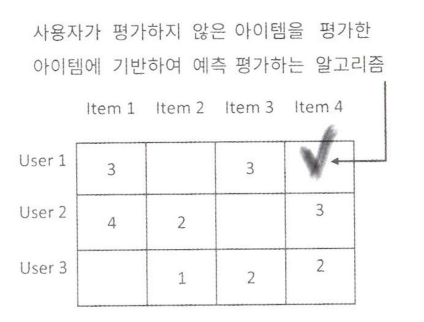

* 행: 개별 사용자
* 열: 개별 아이템
* 성분: 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이자 평점을 나타냄.

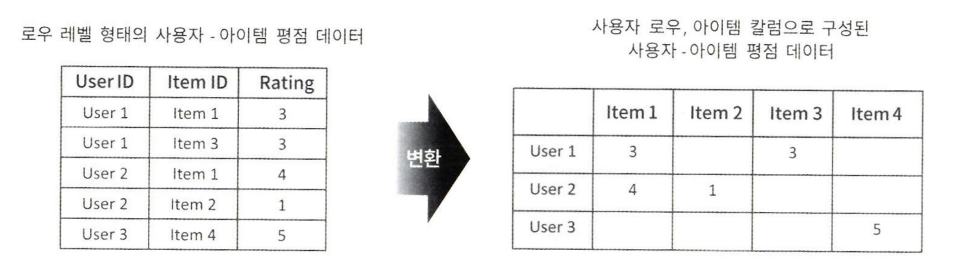

데이터가 레코드 레벨 형태라면, 판다스의 ```pivot_table()``` 을 이용해 사용자-아이템 행렬 형태로 변환





* 많은 아이템을 열로 가지는 다차원 행렬
* 희소 행렬(Sparse Matrix) 특성 보유
* 메모리(Memory) 협업 필터링이라고도 함.
    * 사용자 기반(User-User): 당신과 **비슷한 고객**이 다음 상품도 구매했음
        * 특정 사용자와 유사한(유사도 측정) 다른 사용자를 TOP-N으로 선정해 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식
    * 아이템 기반(Item-Item): **이 상품을** 선택한 다른 고객은 다음 상품도 구매했음
        * 사용자들의 아이템에 대한 선호 평가(호불호) 척도가 유사한 아이템을 추천하는 기준으로 삼는 방식
        * 일반적으로 사용자 기반보다 정확도가 더 높음 -> 대부분의 최근접 이웃 협업 필터링이 적용하는 알고리즘

### **04 잠재 요인 협업 필터링**

**잠재 요인 협업 필터링의 이해**

사용자-아이템 평점 매트릭스 속에 숨은 잠재요인을 추출해 추천 예측하는 기법
* 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출 (**행렬 분석 Matrix Factorization**)
    * 1. 다차원 사용자-아이템 행렬 데이터 분해 \
→ 저차원 밀집 행렬의 사용자-잠재 요인 행렬 + 아이템-잠재 요인 행렬의 전치행렬(잠재 요인 아이템 행렬)
    * 2. 두 행렬의 내적으로 새로운 예측 사용자-아이템 평점 행렬 데이터 생성
    * 3. 새로운 행렬 데이터로 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점 생성 

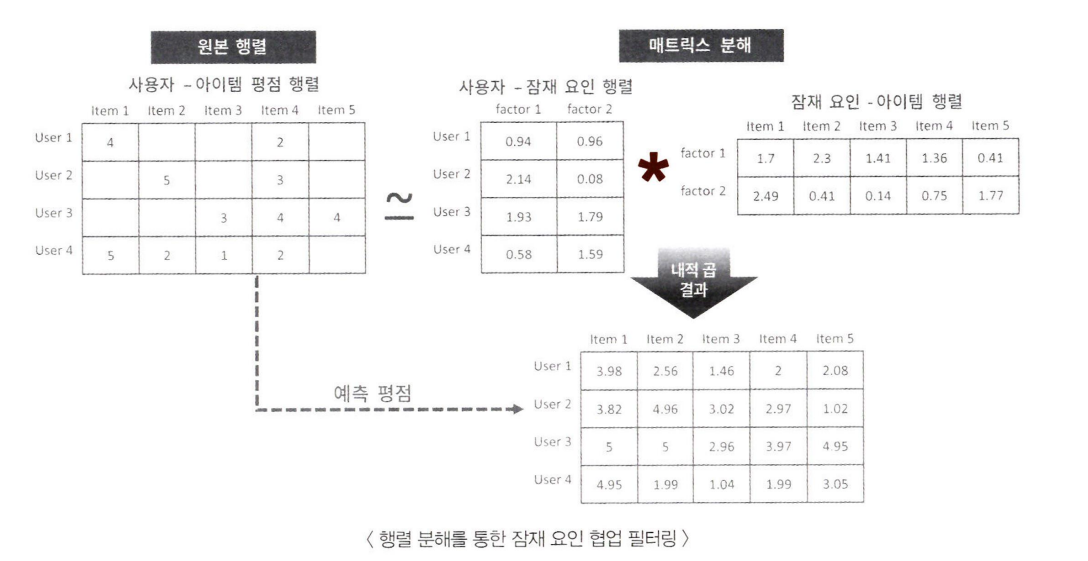

##### **행렬 분해의 이해**

다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
  * SVD (Singular Vector Decomposition) 
    * 널(NaN) 값이 없는 행렬에만 적용 가능 →
        * 확률적 경사 하강법 or ALS(Alternating Least Squares) 방식을 적용한 SVD 수행
  * NMF (Non-Negative Matrix Factorization)

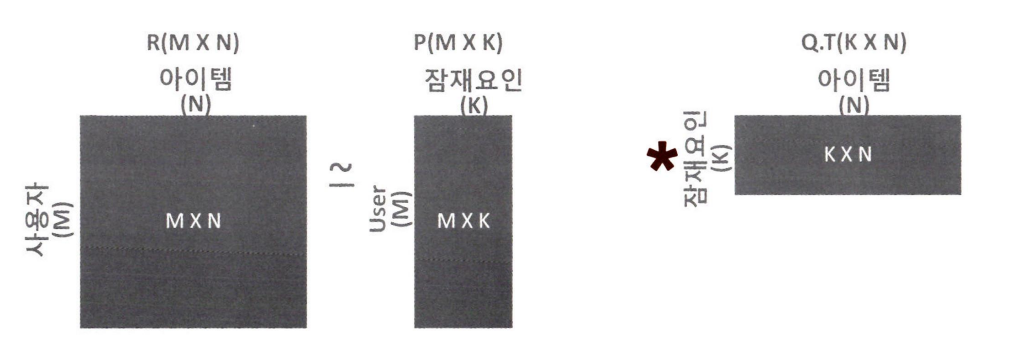

**R = P*Q.T**
* M: 총 사용자 수
* N: 총 아이템 수
* K: 잠재 요인의 차원 수
* R: M X N 차원의 사용자-아이템 평점 행렬
* P: 사용자와 잠재 요인과의 관계 값을 가지는 M X K 차원의 사용자-잠재 요인 행렬
* Q: 아이템과 잠재 요인과의 관계 값을 가지는 N X K 차원의 아이템-잠재 요인 행렬
* Q.T: Q 매트릭스 행과 열 값을 교환한 전치 행렬

##### **확률적 경사 하강법을 이용한 행렬 분해**

P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

[절차]


1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬 생성. 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질 때까지 2,3 작업 반복하면서 P, Q 업데이트하며 근사화

In [ ]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
              [np.NaN, 5, np.NaN, 3, 1],
              [np.NaN, np.NaN, 3, 4, 4],
              [5, 2, 1, 2, np.NaN]])
num_users, num_items = R.shape
K = 3 

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [ ]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)

    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)

    return rmse

In [ ]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000 # SGD 반복해서 업데이트할 횟수
learning_rate = 0.01 # L2 Regularization 계수
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트.
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i,:], Q[j,:].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 50) == 0:
            print('### iteration step:', step, 'rmse:', rmse)

### iteration step: 0 rmse: 3.261355059488935
### iteration step: 0 rmse: 3.26040057174686
### iteration step: 0 rmse: 3.253984404542389
### iteration step: 0 rmse: 3.2521583839863624
### iteration step: 0 rmse: 3.252335303789125
### iteration step: 0 rmse: 3.251072196430487
### iteration step: 0 rmse: 3.2492449982564864
### iteration step: 0 rmse: 3.247416477570409
### iteration step: 0 rmse: 3.241926055455223
### iteration step: 0 rmse: 3.2400454107613084
### iteration step: 0 rmse: 3.240166740749792
### iteration step: 0 rmse: 3.2388050277987723
### iteration step: 50 rmse: 0.5003190892212748
### iteration step: 50 rmse: 0.5001616291326989
### iteration step: 50 rmse: 0.49899601202578087
### iteration step: 50 rmse: 0.4988483450145831
### iteration step: 50 rmse: 0.49895189256631756
### iteration step: 50 rmse: 0.49833236830090993
### iteration step: 50 rmse: 0.4984148489378701
### iteration step: 50 rmse: 0.49792599580240876
### iteration step: 50 rmse: 0.4900605568692785
### itera

In [ ]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
